# Mod 3 Project
## Classification of
mod3project

In [533]:
from bs4 import BeautifulSoup
import pandas as pd
import json
import time
import requests
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import requests 

api_key = "cb28b6201d1c2a41e60cadc3c03c53fe"


def get_info(endpoint, start, end): 
    data = []
    url = f'https://api-v3.igdb.com/{endpoint}'
    headers = {
            'user-key': api_key,
        }
    field = ["genres.name", "age_ratings.category", "age_ratings.rating","aggregated_rating","game_engines.companies",
              "game_engines.name", "release_dates.human", "game_modes.name", "involved_companies.company.name", 
              "involved_companies.developer", "involved_companies.publisher",
              "multiplayer_modes","platforms", "popularity","storyline", "summary", f"name; where (id > {start}) & (id <={end}) & platforms=(6); limit 50;"]

    parameters = {
            "fields" : ",".join(field),
#             'filter[id][gte]': '0',
#             'filter[self.id][lte]': '1000',
    }
    igdb_api = requests.get(url, headers=headers, params=parameters)
    data.append(igdb_api.json())
#     offset += SEARCH_LIMIT
#     search_count = data[0]["total"] - offset

    return data
# data = get_all_info()
# datab

In [275]:
def check_status():
    url = 'https://api-v3.igdb.com/api_status'
    headers = {
            'user-key': api_key,
        }
    igdb_api = requests.get(url, headers=headers)
    return igdb_api.json()



In [385]:
check_status()

[{'authorized': True,
  'plan': 'Free',
  'usage_reports': {'usage_report': {'metric': 'hits',
    'period': 'month',
    'period_start': '2019-03-01 00:00:00 +0000',
    'period_end': '2019-04-01 00:00:00 +0000',
    'max_value': 10000,
    'current_value': 1951}}}]

In [361]:
# explore20 = get_info("games", 14965, 16000)
# check = []
# for data in explore20[0]:
#     check.append(data["id"])
#     check = sorted(check)
# max(check)
len(explore20)

1

In [57]:
explore[0]

[{'id': 90512, 'name': 'Asian Riddles 4'},
 {'id': 98774,
  'game_modes': [{'id': 1, 'name': 'Single player'}],
  'genres': [15, 32],
  'name': 'Whitevale Defender',
  'summary': 'Help King Theodore save Whitevale from hordes of war machines in this handcrafted, retro strategy defense game.'},
 {'id': 54981,
  'name': 'Banned Memories: Yamanashi',
  'summary': 'An indie survival horror game inspired by PS1 low-poly graphics and the likes of early horror titles. The gameplay and visuals feature a retro style with the option to use tank controls and a dualshock controller for an even more authentic experience.'},
 {'id': 60779,
  'genres': [9],
  'name': 'Fallen Shadows',
  'summary': 'A hidden object game set in a post-Katrina New Orleans'},
 {'id': 60730,
  'genres': [14],
  'name': 'Quidditch Manager',
  'summary': 'A free quidditch simulation and management browser game.'},
 {'id': 81332, 'name': 'Stick Fighter II'},
 {'id': 105842, 'name': 'Robots Vs Zombies: Transform To Race And F

In [83]:
explore[0][1], explore1[0][1]

({'id': 98774,
  'game_modes': [{'id': 1, 'name': 'Single player'}],
  'genres': [15, 32],
  'name': 'Whitevale Defender',
  'summary': 'Help King Theodore save Whitevale from hordes of war machines in this handcrafted, retro strategy defense game.'},
 {'id': 98774,
  'game_modes': [{'id': 1, 'name': 'Single player'}],
  'genres': [{'id': 15, 'name': 'Strategy'}, {'id': 32, 'name': 'Indie'}],
  'name': 'Whitevale Defender',
  'summary': 'Help King Theodore save Whitevale from hordes of war machines in this handcrafted, retro strategy defense game.'})

In [158]:
!pip install selenium

    100% |████████████████████████████████| 911kB 6.9MB/s ta 0:00:011


In [331]:
# def automate_get_info(endpoint):
#     lst = []
#     data = []
#     start = 9983
#     end = 11000
#     i = 0
#     while len(data) <= 620:
#         d = get_info(endpoint, start, end)[0]
#         for item in d:
#             lst.append(item["id"]) 
#         data.extend(d)
#         start = max(lst)
#         end = start*50
#         i += 1
#     return data, lst
        
        
       

In [332]:
# auto_data = automate_get_info("games")

In [368]:
our_data_original.extend(explore5[0])
our_data_original.extend(explore6[0])
our_data_original.extend(explore7[0])
our_data_original.extend(explore8[0])
our_data_original.extend(explore9[0])
our_data_original.extend(explore10[0])
our_data_original.extend(explore11[0])
our_data_original.extend(explore12[0])
our_data_original.extend(explore13[0])
our_data_original.extend(explore14[0])
our_data_original.extend(explore15[0])
our_data_original.extend(explore16[0])
our_data_original.extend(explore17[0])
our_data_original.extend(explore18[0])
our_data_original.extend(explore19[0])
our_data_original.extend(explore20[0])


In [34]:
def save_data(file_to_save_to, data):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [384]:
# save_data("751_games.json", our_data_original)

In [387]:
rating = []

for data in our_data_original:
    if 'age_ratings' in data.keys():
        rating.append(data['age_ratings'])

In [388]:
len(rating)

492

In [389]:
popularity = []

for data in our_data_original:
    if 'popularity' in data.keys():
        popularity.append(data['popularity'])

In [390]:
len(popularity)

750

In [393]:
genre = []

for data in our_data_original:
    if 'genres' in data.keys():
        genre.append(data['genres'])

In [394]:
len(genre)

740

In [395]:
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r

In [396]:
def get_review_content(df):
    return [df['reviews'][i]['review'] for i in range(len(df['reviews']))]

In [7]:
def get_steamlist():
    return requests.get('http://api.steampowered.com/ISteamApps/GetAppList/v0002/').json()

games_df = pd.DataFrame(get_steamlist()['applist']["apps"])
games = get_steamlist()['applist']["apps"]

In [111]:
save_data(games, "games.json")

In [426]:
type(games[0]["appid"])

int

In [8]:
len(games)

76587

In [9]:
def get_appid(name, games):
    for i in range(len(games['name'])):
        if games['name'][i].title() == name.title():
            return games['appid'][i]
    return "Did not find"

def get_game_info(appid):
    url = 'https://store.steampowered.com'
    ids = str(appid)
    r = requests.get(url+'/api/appdetails?appids='+ids).json()
    return r

In [20]:
data_from_steam_2[199]

{'1009711': {'success': True,
  'data': {'type': 'dlc',
   'name': 'Arcade Spirits - Artbook',
   'steam_appid': 1009711,
   'required_age': 0,
   'is_free': False,
   'controller_support': 'full',
   'detailed_description': "The Aesthetics of Arcade Spirits is a 54 page art book containing early character sketches, full-color high quality art, background information and notes on the game's development. It includes pre-production and production art of characters, backgrounds, game pixels, and more.<br />\r\n<br />\r\nArt by Molly Nemecek, Taylor Rose, and Justin Baldwin.",
   'about_the_game': "The Aesthetics of Arcade Spirits is a 54 page art book containing early character sketches, full-color high quality art, background information and notes on the game's development. It includes pre-production and production art of characters, backgrounds, game pixels, and more.<br />\r\n<br />\r\nArt by Molly Nemecek, Taylor Rose, and Justin Baldwin.",
   'short_description': 'An art book packed 

In [456]:
# we ended last on Tuesday on 15,000

def retrieve_steam_data(start, end):
    data_from_steam_ = []
    for num, game in enumerate(games[start: end]):
        if game["appid"] >= 10:
            data_from_steam_.append(get_game_info(game["appid"]))
        if num % 100 == 0:
            t = np.random.choice([1,1.1,1.2,1.3,1.4,1.5])
            print(num, t)
            time.sleep(t)
    return data_from_steam_ 
    
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r


In [455]:
get_reviews(413150)

{'success': 1,
 'query_summary': {'num_reviews': 20},
 'reviews': [{'recommendationid': '49788756',
   'author': {'steamid': '76561198156307585',
    'num_games_owned': 248,
    'num_reviews': 6,
    'playtime_forever': 1067,
    'playtime_last_two_weeks': 1067,
    'last_played': 1553655373},
   'language': 'english',
   'review': 'Nice little game for you and your friends to play, just make sure not to spend all of your money in one go. The farming x dating sim is a great mix\n',
   'timestamp_created': 1553696068,
   'timestamp_updated': 1553696068,
   'voted_up': True,
   'votes_up': 0,
   'votes_funny': 0,
   'weighted_vote_score': 0,
   'comment_count': 0,
   'steam_purchase': True,
   'received_for_free': False,
   'written_during_early_access': False},
  {'recommendationid': '49787487',
   'author': {'steamid': '76561198315640718',
    'num_games_owned': 4,
    'num_reviews': 1,
    'playtime_forever': 4061,
    'playtime_last_two_weeks': 309,
    'last_played': 1553699259},
  

In [35]:
def save_data(data, file_to_save_to):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [37]:
def open_save_data(file_to_open):
        """takes in a filename to open
           return """
        with open(file_to_open) as datajson:
            new_data =json.load(datajson)
        return new_data

# Open Json Files

In [402]:
k10 = open_save_data("10K_data.json")
k15 = open_save_data("15K_data.json")
k20 = open_save_data("test_20k.json")
k30 = open_save_data("30K_data.json")

In [491]:
k40_1k = open_save_data("1000_data_30000.json")
k40_2k = open_save_data("2000_data_30000.json")
k40_3k = open_save_data("3000_data_30000.json")
k40_4k = open_save_data("4000_data_30000.json")
k40_5k = open_save_data("5000_data_30000.json")
k40_6k = open_save_data("6000_data_30000.json")
k40_7k = open_save_data("7000_data_30000.json")
k40_8k = open_save_data("8000_data_30000.json")
k40_9k = open_save_data("9000_data_30000.json")
k40_10k = open_save_data("test_40k.json")

In [549]:
k50 = open_save_data("50K_data.json")

In [556]:
len(k50)

10000

In [550]:
all_50K = all_40K + k50

In [551]:
len(all_50K)

49997

In [440]:
all_30K = np.array(k10+k15+k20+k30)

In [538]:
some_30K_40K = k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k

In [539]:
len(some_30K_40K)

9997

In [503]:
all_40K = k10+k15+k20+k30+k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k

In [548]:
save_data(some_30K_40K, "40K_data.json")

In [552]:
save_data(all_50K, "all50K.json")

In [561]:
save_data(cleaned_30_50K, "30K-50K.json")

In [547]:
len(all_40K)

39997

In [505]:
# save_data(data_from_steam_3, "15K_data.json")

In [441]:
len(all_30K)

30000

In [51]:
# test_15K = open_save_data("15K_data.json")

In [112]:
combo = test_10K + test_15K

In [56]:
# save_data(combo, "15K_comno.json")

# Initial Clean

In [442]:
# helper for the clean non_id
def del_unwanted(dic, unwanted_lst):
    dic_copy = copy.deepcopy(dic)
    for key in unwanted_lst:
        if key in dic_copy:
            del dic_copy[key]
    return dic_copy

def clean_non_id_data(games_list, start, end):
    data_dic_lst = []
    data_f = copy.deepcopy(games_list)
    for game in data_f[start:end]:
        if type(game) == dict:
            for key, val in game.items():
                if "success" in val:
                        del val["success"]
                if val != {}:
                    new_val = del_unwanted(val["data"], ["header_image", "website", "packages", "package_groups",
                                                        "screenshots", "movies", "support_info", "background",
                                                        "content_descriptors", "controller_support", "drm_notice",
                                                        "ext_user_account_notice", "detailed_description", 
                                                        "short_description", "legal_notice", "linux_requirements",
                                                        "mac_requirements", "fullgame", "publishers", "demos",
                                                        "pc_requirements", "release_date"])
            
                    data_dic_lst.extend([new_val])
    return data_dic_lst

In [396]:
cleaned_15k_2 = clean_non_id_data(combo,0, len(combo))
len(cleaned_15k_2)

4521

## Removing Columns we don't need

In [444]:
cleaned_30K = clean_non_id_data(all_30K,0, len(all_30K))
len(cleaned_30K)

9973

In [540]:
cleaned_30_40K = clean_non_id_data(some_30K_40K,0, len(some_30K_40K))
len(some_30K_40K)

9997

In [523]:
cleaned_40K = clean_non_id_data(all_40K,0, len(all_40K))
len(cleaned_40K)

12115

In [553]:
cleaned_50K = clean_non_id_data(all_50K,0, len(all_50K))
len(cleaned_50K)

15220

In [560]:
cleaned_30_50K = clean_non_id_data(some_30K_40K+k50,0, len(some_30K_40K+k50))
len(cleaned_30_50K)

5247

## More cleaning organizing columns

In [521]:
def clean_data(dirty_dic):
    clean_money(dirty_dic, True, False)
    clean_dev(dirty_dic, False)
    convert_to_1_0(dirty_dic, False)
    date_reformatting(dirty_dic, False)
    dlc_reformatting(dirty_dic, False)
    get_clean_dummies(dirty_dic, "categories", False)
    get_clean_dummies(dirty_dic, "genres", False)
    get_total_from_dic(dirty_dic, "recommendations", False)
    get_total_from_dic(dirty_dic, "achievements", False)
    get_platform_dummies(dirty_dic, False)
    get_metas_from_dic(dirty_dic, False)
    clean_language(dirty_dic, keep=False)
    return pd.DataFrame(dirty_dic)

In [446]:
df_clean_30K = pd.DataFrame(clean_data(cleaned_30K))

In [460]:
df_clean_30K.to_json("cleaned_30K.json")

In [541]:
df_30k_40_k = clean_data(cleaned_30_40K)

In [543]:
appid30_40 = df_30k_40_k.steam_appid.tolist()

In [545]:
save_data(appid30_40, "appid30k40k.json")

In [524]:
df_clean_40K = pd.DataFrame(clean_data(cleaned_40K))

In [555]:
df_clean_50K = clean_data(cleaned_50K)

In [398]:
df_clean = pd.DataFrame(clean_data(cleaned_15k_2))

In [511]:
df_clean_40K.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'alternate_appid',
       'developers', 'dlc', 'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'release_date', 'required_age', 'reviews', 'steam_appid', 'type',
       'windows'],
      dtype='object')

In [513]:
239958

239958

In [457]:
app_id_lst = df_clean_30K.steam_appid.tolist()

In [464]:
sorted(app_id_lst)[8474]

826496

In [399]:
df_clean.shape

(4521, 39)

# Functions to help clean

In [427]:
descriptions = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Action',
                'Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
               "Strategy", "Sports", "Free to Play", "Early Access"]

platforms_lst = ["windows", "mac", "linux"]

months = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, 
          "Oct":10, "Nov":11, "Dec":12}

def get_clean_dummies(clean_dic, desc_key, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        for key in descriptions:
            data[key] = 0
        if desc_key in data:
            for cat in data[desc_key]:
                if cat["description"] in descriptions:
                    data[cat["description"]] = 1
            del data[desc_key]
    return cleaned

def get_platform_dummies(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned: 
        if "platforms" in data:
            for key in platforms_lst:
                data[key] = 0 
                if key in data["platforms"]:
                    data[key] = int(data["platforms"][key])
        else:
            for key in platforms_lst:
                data[key] = 0 
        del data["platforms"]
    return cleaned

def get_total_from_dic(clean_dic, column, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if column in data:
            data[column] = data[column]["total"]
        else:
            data[column] = 0
    return cleaned

def get_metas_from_dic(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "metacritic" in data:
            data["metacritic"] = data["metacritic"]["score"]
        else:
            data["metacritic"] = 0
    return cleaned

def clean_dev(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    cleaned = copy.deepcopy(clean_dic)
    for data in cleaned:
        if "developers" in data:
            data["developers"] = ", ".join(data["developers"])
        else:
            data["developers"] = ""
    return cleaned

def dlc_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "dlc" in data:
            data["dlc"] = len(data["dlc"])
        else:
            data["dlc"] = 0
    return cleaned

def date_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "release_date" in data:
            if data["release_date"]["date"][:3] in months:
                data["release_date"] = months[data["release_date"]["date"][:3]]
            else:
                data["release_date"] = 0
        else:
                data["release_date"] = 0
    return cleaned

def convert_to_1_0(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "is_free" in data:
            data["is_free"] = int(data["is_free"])
        else:
            data["is_free"] = 0
    return cleaned

def clean_money(clean_dic, nans_to_zero=False, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "price_overview" in data:
            data["price_overview"] = round(data["price_overview"]["final"]*.01, 2)
        else:
            if nans_to_zero:
                data["price_overview"] = 0
    return cleaned

def clean_language(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "supported_languages" in data:
            data["num_supported_languages"] = len(data["supported_languages"].split(","))
            del data["supported_languages"]
        else:
             data["num_supported_languages"] = 1
        
    return cleaned


In [171]:
test_cats1 = get_clean_dummies(test_ach, "categories")

In [177]:
test_gens = get_clean_dummies(test_cats1, "genres")

In [207]:
test_rec = get_total_from_dic(test_gens, "recommendations")

In [226]:
test_meta = get_metas_from_dic(test_rec)

In [352]:
test_plat = get_platform_dummies(test_meta)

In [282]:
test_dev = clean_dev(test_plat)

In [292]:
test_dlc = dlc_reformatting(test_dev)

In [320]:
test_date = date_reformatting(test_dlc)

In [332]:
test_is_free = convert_to_1_0(test_date)

In [380]:
test_price1 = clean_money(test_is_free)

In [381]:
test_price2 = clean_money(test_is_free, True)

In [428]:
test_lang = clean_language(test_price2)

In [434]:
test_lang[3]["num_supported_languages"]

1

In [383]:
test_price2[0]["price_overview"]

0

In [484]:
d = {"k" : 3}
e = {'f':4}

a.append(d)
a

[{'f': 4}, {'f': 4}, {'k': 3}]

# Explore DataFrame

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


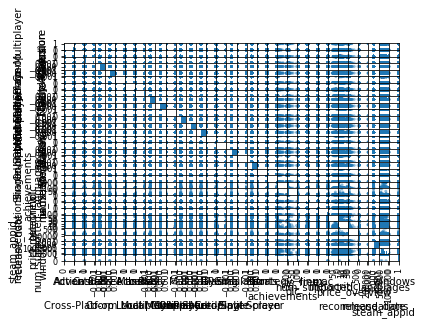

In [461]:
pd.plotting.scatter_matrix(df_clean_30K, figsize);

In [530]:
sum(df_clean_40K["Cross-Platform Multiplayer"]) == 0

True

In [ ]:
plt.heatmapdf_clean_40K

In [490]:
252950 in app_id_lst

False

In [531]:
df_clean_40K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,12115.000000,12115.000000,12115.000000,12115.0,12115.0,12115.000000,12115.000000,12115.000000,12115.0,12115.0,...,12115.000000,12115.000000,12115.000000,12115.000000,12115.000000,12115.000000,12115.000000,12115.0,1.211500e+04,12115.000000
mean,0.288816,0.224267,0.240198,0.0,0.0,0.043747,0.053157,0.439208,0.0,0.0,...,0.112588,0.163021,0.264713,2.893273,2.800000,5.288651,165.605035,0.0,5.846780e+05,0.999752
std,0.453231,0.417116,0.427221,0.0,0.0,0.204541,0.224356,0.496311,0.0,0.0,...,0.316101,0.369400,0.441199,14.360776,3.822507,13.198984,4494.536997,0.0,2.340589e+05,0.015735
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.520000e+03,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,5.197115e+05,1.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000,0.0,6.090700e+05,1.000000
75%,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,2.000000,5.990000,0.000000,0.0,7.157050e+05,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,94.000000,29.000000,595.990000,239958.000000,0.0,1.047920e+06,1.000000


### Quick Observation

There are some columns that have no relevant information because they all 

In [384]:
df_test_almost_clean = pd.DataFrame(test_price1)
df_test_almost_clean2 = pd.DataFrame(test_price2)

In [393]:
df_test_almost_clean.shape

(4521, 42)

In [330]:
int(True)

1

In [343]:
test_dlc[66]["is_free"]

False

In [283]:
test_dev[23]["developers"]

'GRASSHOPPER MANUFACTURE INC., SUPERTRICK  GAMES,Inc.'

In [277]:
test_meta[23]["developers"]

['GRASSHOPPER MANUFACTURE INC.', 'SUPERTRICK  GAMES,Inc.']

In [354]:
test_meta[2]["platforms"]["windows"]

True

In [356]:
test_plat[2]["linux"]

0

In [337]:
test_rec[2]["mac"]

KeyError: 'mac'

In [211]:
test_gens[6]["name"]

'Manna for our Malices'

In [287]:
pd.DataFrame(test_dev).shape

(4521, 42)

In [185]:
test_cats[1]["genres"]

[{'id': '4', 'description': 'Casual'}, {'id': '23', 'description': 'Indie'}]

In [156]:
len(pd.DataFrame(test_cats).columns)

29

In [167]:
test_ach[3]["categories"]

[{'id': 2, 'description': 'Single-player'},
 {'id': 22, 'description': 'Steam Achievements'}]

In [520]:
pd.DataFrame(cleaned_15k)

,about_the_game,achievements,categories,demos,developers,dlc,genres,is_free,metacritic,name,...,platforms,price_overview,publishers,recommendations,release_date,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'appid': 1019840, 'description': ''}]",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[The Midnight Team],NaN,"{'coming_soon': True, 'date': 'Coming soon™'}",0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,...,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Double Mojo],NaN,"{'coming_soon': False, 'date': 'Feb 11, 2019'}",0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Adventure Islands],NaN,"{'coming_soon': False, 'date': 'Mar 1, 2019'}",0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",[TheBlavas],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[Saint Paul Studios],NaN,"{'coming_soon': False, 'date': 'Feb 3, 2019'}",0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game
5,Prepare to lead your favorite school to champi...,{'total': 0},"[{'id': 2, 'description': 'Single-player'}]",NaN,[Wolverine Studios],NaN,"[{'id': '23', 'description': 'Indie'}, {'id': ...",False,NaN,Draft Day Sports: College Football 2019,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 3499, 'final': ...",[Wolverine Studios],NaN,"{'coming_soon': False, 'date': 'Feb 8, 2019'}",0,NaN,1013700,English,game
6,"<h2 class=""bb_tag"">Pick up this powerful pack ...",{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Trion Worlds],NaN,"[{'id': '37', 'description': 'Free to Play'}, ...",False,NaN,RIFT - Laethys' Indulgence Power Pack,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 2999, 'final': ...",[Trion Worlds],NaN,"{'coming_soon': False, 'date': 'Jan 23, 2019'}",0,NaN,1013740,"French<strong>*</strong>, German<strong>*</str...",dlc
7,&quot;Jigsaw Masterpieces : Masterpieces of Wo...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[BottleCube inc.],NaN,"[{'id': '4', 'description': 'Casual'}]",False,NaN,Jigsaw Masterpieces : Masterpieces of World - ...,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 299, 'final': 2...",[BottleCube inc.],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013780,"English, Japanese",dlc
8,This is a logical puzzle game needs brain.<br>...,"{'total': 2, 'highlighted': [{'name': 'Thinker...","[{'id': 2, 'description': 'Singl

In [206]:

test_ach = get_achievement_total(cleaned_15k)

In [ ]:
get_total_from_dic()

In [162]:
test_ach[3]["genres"]

[{'id': '1', 'description': 'Action'},
 {'id': '25', 'description': 'Adventure'},
 {'id': '23', 'description': 'Indie'}]

In [137]:
cleaned_15k[3]["achievements"]

{'total': 10,
 'highlighted': [{'name': 'Church',
   'path': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/apps/1013660/c9d1c560f894f154753a62a80a04b72ba87f517a.jpg'},
  {'name': 'Compass',
   'path': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/apps/1013660/84591f64fee05aabcadf8fe2fdbf49c083aed054.jpg'},
  {'name': 'Craft Machine',
   'path': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/apps/1013660/3e8589ab4f97929d50af7d297738734b7d8a917f.jpg'},
  {'name': 'Gas Mask',
   'path': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/apps/1013660/6546b0ab6611cdc9842b49f39baa342a897bca94.jpg'},
  {'name': 'Gears',
   'path': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/apps/1013660/eaf8f1d66afc6e92734a71bece489939884dd517.jpg'},
  {'name': 'Hospital',
   'path': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/apps/1013660/8438b1580591188043ab433fa8bceb273dc6d6b2.jpg'},
  {'name': 'Military Hostel',


In [79]:
c_data = pd.DataFrame(cleaned_15k)

In [515]:
c_data.recommendations.max()

TypeError: '>=' not supported between instances of 'float' and 'dict'

In [259]:
c_data.columns

Index(['about_the_game', 'achievements', 'categories', 'demos', 'developers',
       'dlc', 'genres', 'is_free', 'metacritic', 'name', 'pc_requirements',
       'platforms', 'price_overview', 'publishers', 'recommendations',
       'release_date', 'required_age', 'reviews', 'steam_appid',
       'supported_languages', 'type'],
      dtype='object')

In [286]:
c_data.release_date

0        {'coming_soon': True, 'date': 'Coming soon™'}
1       {'coming_soon': False, 'date': 'Feb 11, 2019'}
2        {'coming_soon': False, 'date': 'Mar 1, 2019'}
3       {'coming_soon': False, 'date': 'Mar 11, 2019'}
4        {'coming_soon': False, 'date': 'Feb 3, 2019'}
5        {'coming_soon': False, 'date': 'Feb 8, 2019'}
6       {'coming_soon': False, 'date': 'Jan 23, 2019'}
7       {'coming_soon': False, 'date': 'Mar 11, 2019'}
8       {'coming_soon': False, 'date': 'Mar 12, 2019'}
9        {'coming_soon': True, 'date': 'May 22, 2019'}
10        {'coming_soon': True, 'date': 'Coming Soon'}
11      {'coming_soon': False, 'date': 'Jan 25, 2019'}
12       {'coming_soon': False, 'date': 'Feb 7, 2019'}
13       {'coming_soon': False, 'date': 'Feb 6, 2019'}
14      {'coming_soon': False, 'date': 'Feb 25, 2019'}
15       {'coming_soon': False, 'date': 'Mar 7, 2019'}
16      {'coming_soon': False, 'date': 'Jan 31, 2019'}
17      {'coming_soon': False, 'date': 'Jan 30, 2019'}
18      {'

In [324]:
c_data.head()

,about_the_game,achievements,categories,demos,developers,dlc,genres,is_free,metacritic,name,...,platforms,price_overview,publishers,recommendations,release_date,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'appid': 1019840, 'description': ''}]",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[The Midnight Team],NaN,"{'coming_soon': True, 'date': 'Coming soon™'}",0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,...,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Double Mojo],NaN,"{'coming_soon': False, 'date': 'Feb 11, 2019'}",0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Adventure Islands],NaN,"{'coming_soon': False, 'date': 'Mar 1, 2019'}",0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",[TheBlavas],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[Saint Paul Studios],NaN,"{'coming_soon': False, 'date': 'Feb 3, 2019'}",0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game


In [370]:
round(1999*.01, 2)

19.99

In [395]:
c_data.reviews

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15      “It’s time to become ... a hamster”<br><a href...
16                                                    NaN
17            

In [603]:
get_game_info('332190')

{'332190': {'success': False}}

In [24]:
for num, game in enumerate(x):
    print(num, game)

0 1
1 2
2 3
3 3.5


In [601]:
games[1]

{'appid': 332190, 'name': 'Happy Wars - Customizable Parts A'}

In [590]:
lst1

In [612]:
# data_df_clean.to_csv("cleaned_v1")

In [522]:
len(data_from_steam[1])

1

In [505]:
x = [12,3,3]

In [459]:
len(games[:1100])

1100

In [514]:
data_from_steam[0]

{'332150': {'data': {'type': 'game',
   'name': 'LEVEL UP!',
   'steam_appid': 332150,
   'required_age': 0,
   'is_free': False,
   'detailed_description': "In this side-scrolling platformer/shooter with finely destructible levels and bosses you level up your character by literally going up to the next level. Each level-up earns you some points to spend on upgrades: more health, firepower, new weapons, skills, etc. Also it's made of voxels, so you can destroy walls and dig tunnels or trenches to hide from enemy fire, and blast holes in huge bosses to get to the vulnerable spots inside them.",
   'about_the_game': "In this side-scrolling platformer/shooter with finely destructible levels and bosses you level up your character by literally going up to the next level. Each level-up earns you some points to spend on upgrades: more health, firepower, new weapons, skills, etc. Also it's made of voxels, so you can destroy walls and dig tunnels or trenches to hide from enemy fire, and blast h